<a href="https://colab.research.google.com/github/Flychuban/Plant_Leaf_Disease_Classification/blob/main/ClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from math import floor, ceil

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
# Load data
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/PlantDiseaseClassification/data", shuffle=True, image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 484 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
num_classes = len(class_names)
num_classes

3

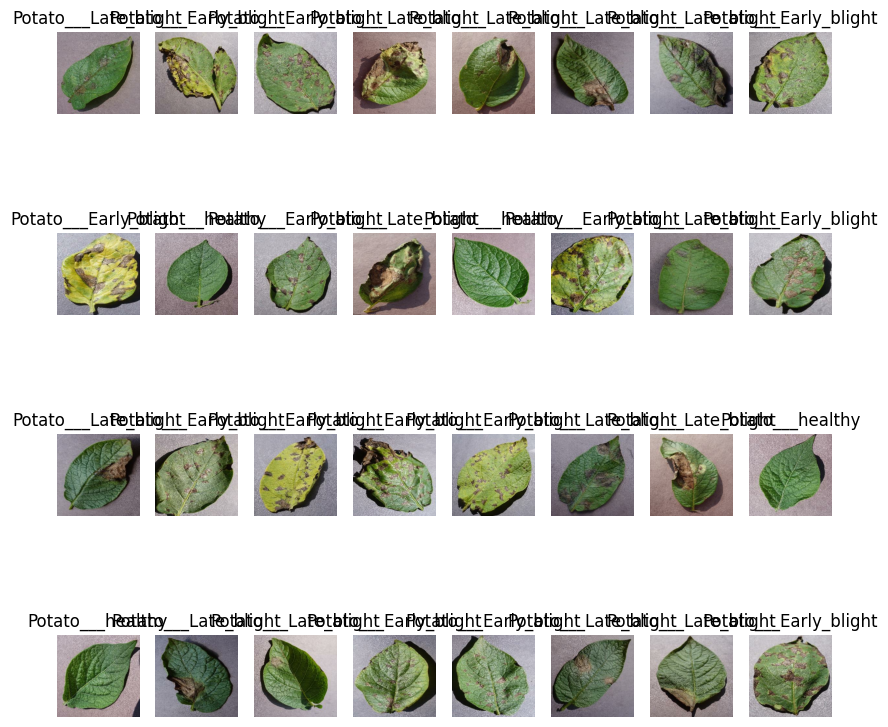

In [5]:
# Plot batch of images
for image_batch, label_batch in dataset.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(BATCH_SIZE):
    ax = plt.subplot(4, 8, i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i].numpy()])
    plt.axis('off')

Train Val Test split

In [6]:
train_data = dataset.take(floor(len(dataset) * 0.8))
val_data = dataset.skip(floor(len(dataset) * 0.8)).take(ceil(len(dataset) * 0.1))
test_data = dataset.skip(floor(len(dataset) * 0.8)).skip(ceil(len(dataset) * 0.1)).take(ceil(len(dataset) * 0.1))

Preprocess data

In [7]:
train_data = train_data.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
resize_and_rescale = Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255.0)
])

Data augumentation to make more data

In [9]:
data_aug = Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [10]:
from keras.src.layers.serialization import activation
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3) # 3 for num channels

model = Sequential([
    resize_and_rescale,
    data_aug,
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [12]:
from keras.src import metrics
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
# Model training
model.fit(train_data, batch_size=BATCH_SIZE, epochs=50, verbose=1, validation_data=val_data)

Epoch 1/50
12/12 [==============================] - 35s 137ms/step - loss: 1.1082 - accuracy: 0.3359 - val_loss: 1.0785 - val_accuracy: 0.5000
Epoch 2/50
12/12 [==============================] - 1s 61ms/step - loss: 1.0899 - accuracy: 0.3932 - val_loss: 1.0414 - val_accuracy: 0.5000
Epoch 3/50
12/12 [==============================] - 1s 61ms/step - loss: 1.0905 - accuracy: 0.3802 - val_loss: 1.0564 - val_accuracy: 0.5000
Epoch 4/50
12/12 [==============================] - 1s 61ms/step - loss: 1.0773 - accuracy: 0.3672 - val_loss: 0.9953 - val_accuracy: 0.5000
Epoch 5/50
12/12 [==============================] - 1s 60ms/step - loss: 1.0414 - accuracy: 0.3958 - val_loss: 0.8430 - val_accuracy: 0.5469
Epoch 6/50
12/12 [==============================] - 1s 62ms/step - loss: 0.9393 - accuracy: 0.5573 - val_loss: 0.6934 - val_accuracy: 0.6562
Epoch 7/50
12/12 [==============================] - 1s 61ms/step - loss: 0.8178 - accuracy: 0.5990 - val_loss: 0.6697 - val_accuracy: 0.7031
Epoch 8/50
